In [1]:
# pip install imblearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Understand the structure, column types, and any missing data.
# Key Observations:31 columns: Time, Amount, Class, and anonymized V1–V28.No missing values.

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Class Distribution: Check for class imbalance between legitimate and fraudulent transactions.
# Key Observations:Highly imbalanced: Class 0 (legit) ≫ Class 1 (fraud).

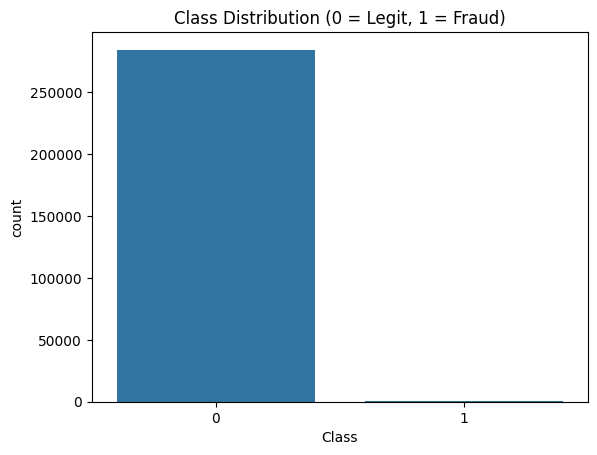

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [7]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()
print(df['Class'].value_counts(normalize=True))

In [8]:
# Correlation Matrix: Understand relationships between features.
#Key Observations:Some features like V17, V14, V12, etc., are highly correlated with Class.

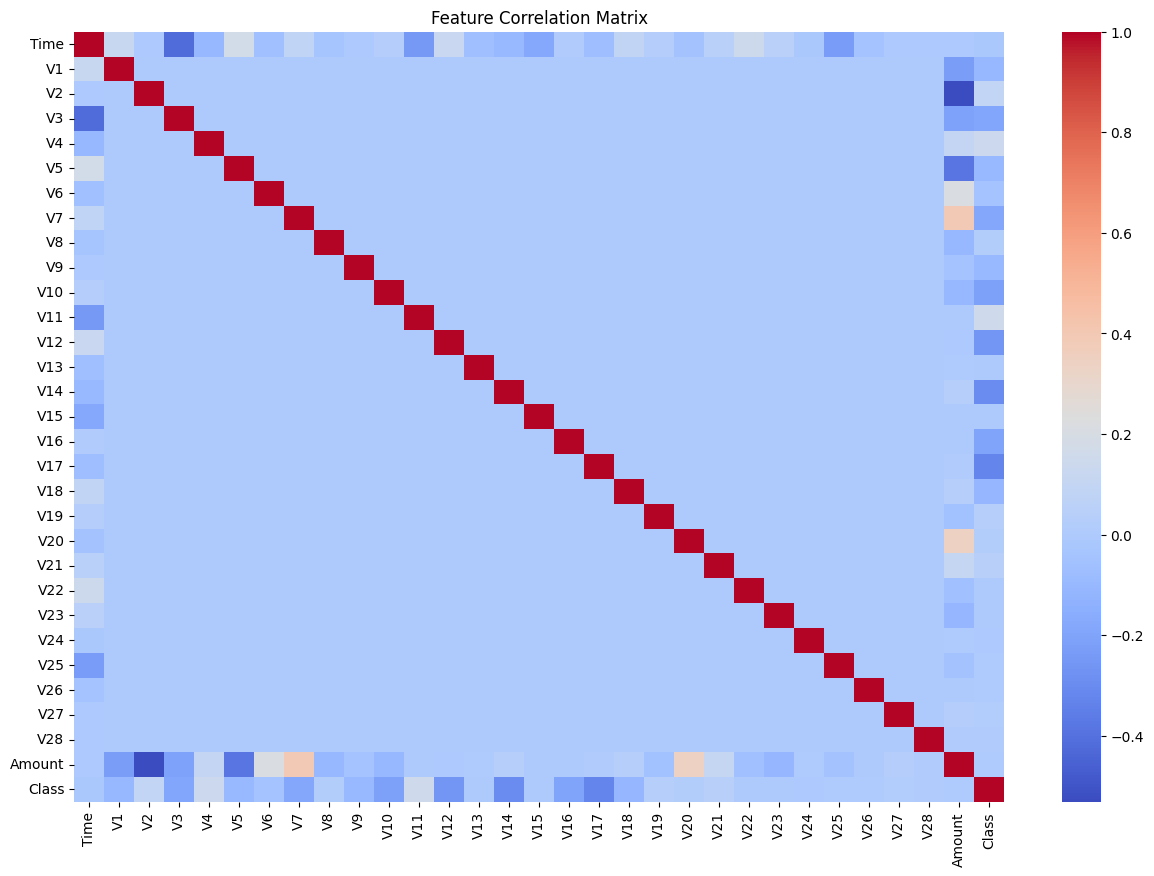

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [10]:
# Boxplot: Amount by Class: Analyze the distribution of transaction amounts for legit and fraud.
# Key Observations: Fraud transactions often have lower median amounts.

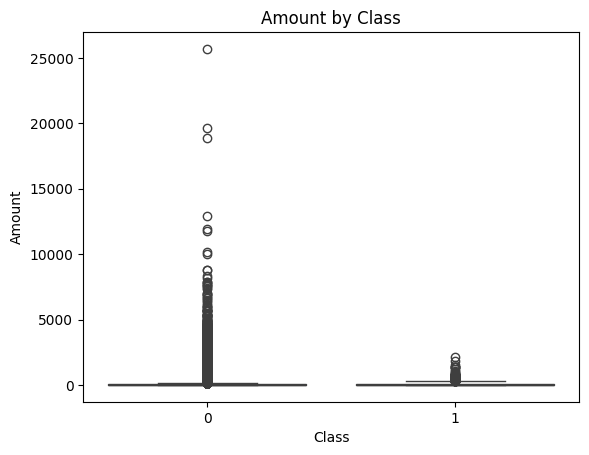

In [11]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount by Class')
plt.show()

In [12]:
# KDE Plots for PCA Features: Compare feature distributions for legit vs fraud for selected V features.
# Key Observations: Certain features show clear distributional differences for fraud vs legit.

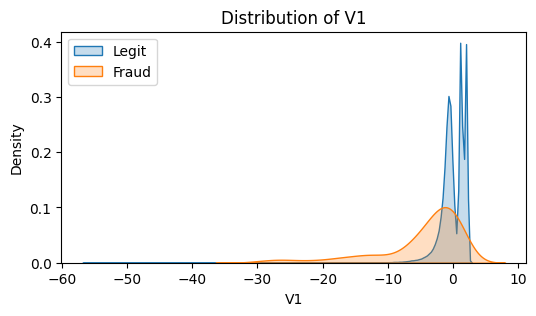

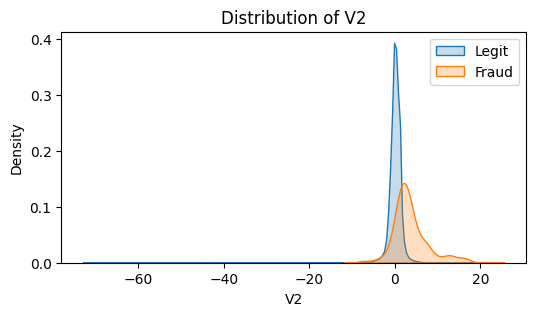

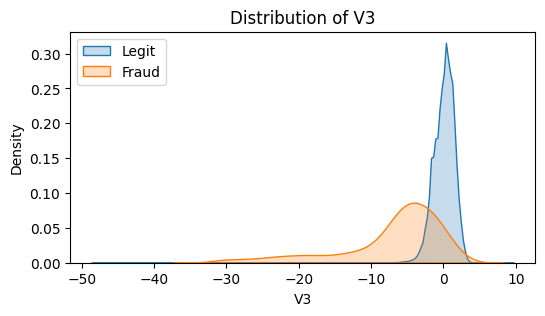

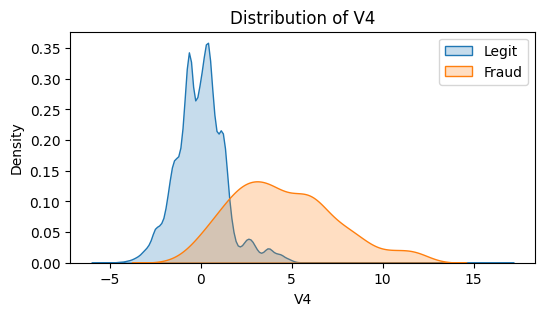

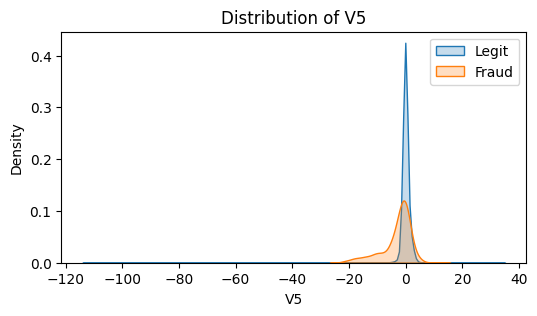

In [13]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']

for feature in features:
    plt.figure(figsize=(6,3))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Legit', fill=True)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

In [14]:
# Transaction Time Trends: Find any patterns by hour of transaction.
# Key Observations:Fraud transactions may cluster around specific hours.

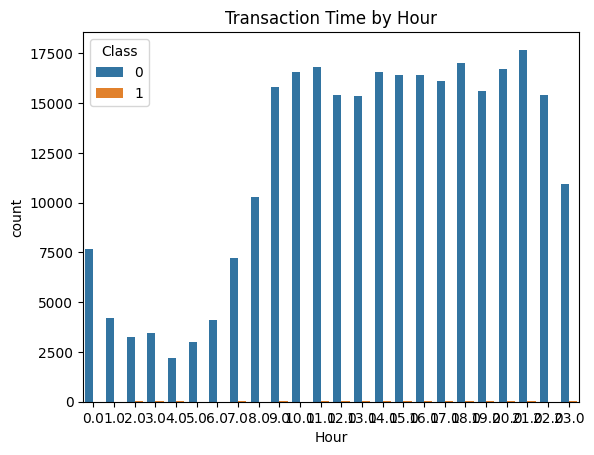

In [15]:
df['Hour'] = df['Time'] // 3600 % 24
sns.countplot(x='Hour', hue='Class', data=df)
plt.title('Transaction Time by Hour')
plt.show()

In [16]:
# Correlation with Class: Identify features most correlated with fraud.
# Key Observations:V17, V14, V12, and V10 have strong correlations (positive/negative) with fraud.

In [17]:
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
print(correlation_with_class)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
Hour     -0.017109
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [18]:
# Scaling Amount and Time because these both have different scales, 
# adjust values for the scale such that it wont create any further issue.

In [19]:
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

In [20]:
# Drop original time and amount
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [22]:
## Random Under Sampler,
# # Import libraries
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# # Separate features and target
# X = df.drop('Class', axis=1)
# y = df['Class']

# # Apply RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_res_rus, y_res_rus = rus.fit_resample(X, y)

# # Check new class distribution
# print("Original class distribution:", Counter(y))
# print("After RandomUnderSampler:", Counter(y_res_rus))

In [23]:
# Model Building:
# 3 models: Logistic Regression, Random Forest, XGBoost

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
#Train Test Split data
# Why? To train your model on one set and evaluate on another to prevent overfitting.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [26]:
# Logistic Regression: A simple linear model. Good baseline for binary classification.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [27]:
# Random Forest, Ensemble of decision trees, Handles imbalance and non-linearity well.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [28]:
# XGBoost with GridSearchCV, A powerful gradient boosting algorithm, You tuned it using GridSearchCV to get the best hyperparameters.

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}
grid_xgb = GridSearchCV(xgb, params, cv=3, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
y_pred_xgb = grid_xgb.predict(X_test)

print("Best Params (XGB):", grid_xgb.best_params_)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [18:03:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params (XGB): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [29]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name}")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_pred)
    print("AUC-ROC:", auc)

In [30]:
#  Evaluate All Models
# AUC-ROC stands for Area Under the Receiver Operating Characteristic Curve. Shows difference between classes.
# 
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost (Tuned)")


🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     85295
           1       0.97      0.93      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

AUC-ROC: 0.9502076692082956

🔍 Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC-ROC: 0.999894483850167

🔍 XGBoost (Tuned)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg  

In [36]:
# #  ROC Curve Comparison
# def plot_roc(model, X_test, y_test, label):
#     probs = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, probs)
#     plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc_score(y_test, probs):.2f})")

# plt.figure(figsize=(8, 6))
# plot_roc(lr, X_test, y_test, "Logistic Regression")
# plot_roc(rf, X_test, y_test, "Random Forest")
# plot_roc(grid_xgb.best_estimator_, X_test, y_test, "XGBoost")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend()
# plt.title("ROC Curves")
# plt.grid()
# plt.show()

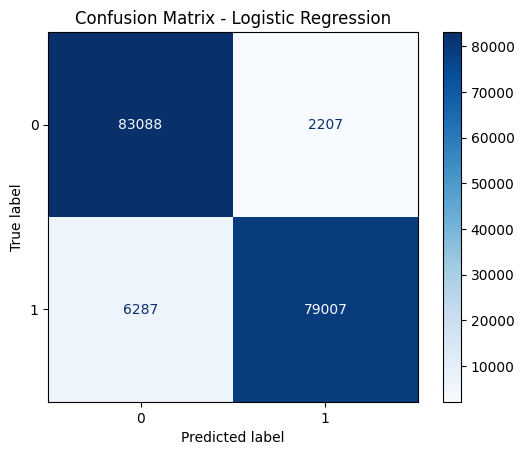

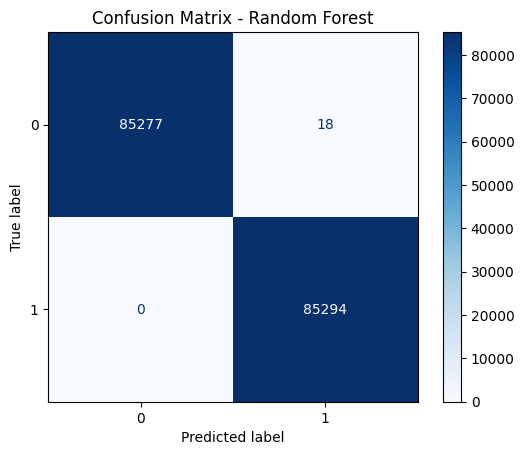

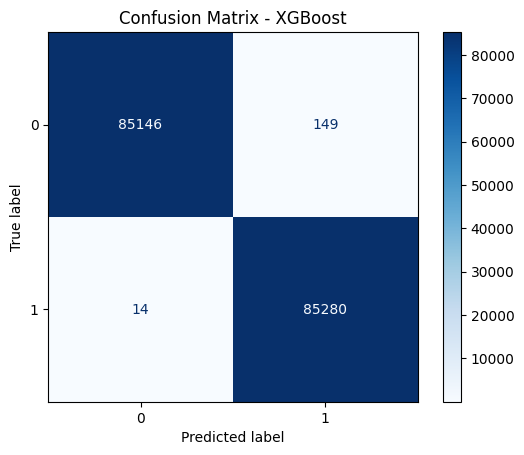

In [32]:
def show_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.grid(False)
    plt.show()

show_confusion(y_test, y_pred_lr, "Logistic Regression")
show_confusion(y_test, y_pred_rf, "Random Forest")
show_confusion(y_test, y_pred_xgb, "XGBoost")


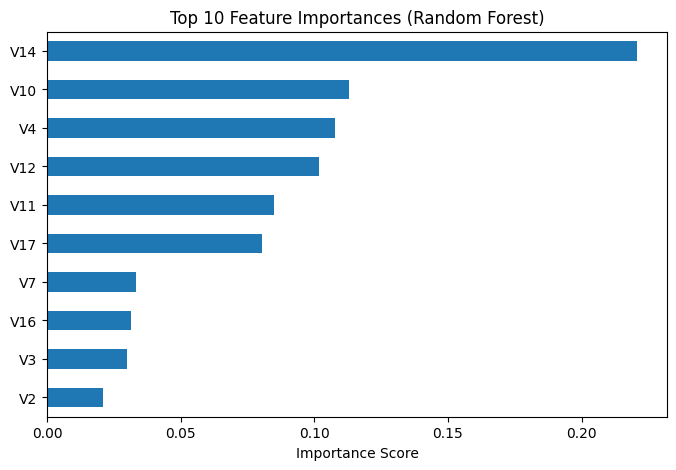

In [33]:
features = X_train.columns
importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp[:10].plot(kind='barh', title='Top 10 Feature Importances (Random Forest)', figsize=(8, 5))
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

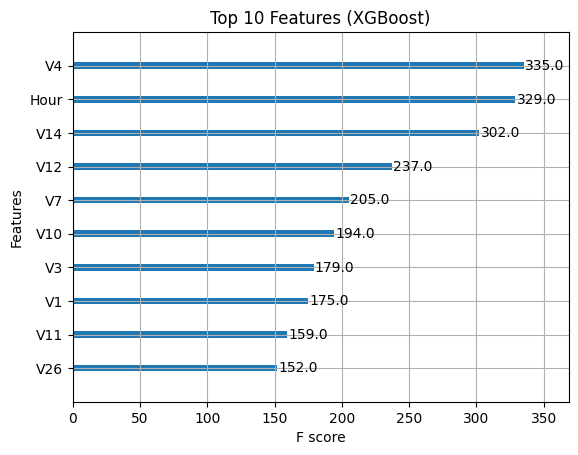

In [34]:
plot_importance(grid_xgb.best_estimator_, max_num_features=10)
plt.title("Top 10 Features (XGBoost)")
plt.show()

In [37]:
import joblib

# Save the best XGBoost model and the scaler
joblib.dump(grid_xgb.best_estimator_, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']